<img style="float: right;" src="files/EHT.jpg" width="100" height="100">

## Primeros modelos de clasificación con Python

Para este tutorial se seguirá utilizando el conjunto de datos del tutorial anterior. Las primeras 7 celdas contienen la misma información que el ejemplo anterior, donde se importan los datos y los revisamos para saber con que estaremos trabajando.

### Importar y revisar los datos

In [1]:
import pandas as pd

dataset = pd.read_csv('pima-indians-diabetes.csv', header=None)

In [2]:
dataset.columns = [
    "NumTimesPrg", "PlGlcConc", "BloodP",
    "SkinThick", "TwoHourSerIns", "BMI",
    "DiPedFunc", "Age", "HasDiabetes"]

In [3]:
dataset.shape

(768, 9)

Como se puede ver, la última columna que corresponde a la salida, tiene valores cero y uno, por lo que estamos lidiando con un problema de clasificación binaria.

In [4]:
dataset.head()

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# matriz de correlación
corr = dataset.corr()
corr

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
NumTimesPrg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
PlGlcConc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodP,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThick,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
TwoHourSerIns,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiPedFunc,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
HasDiabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


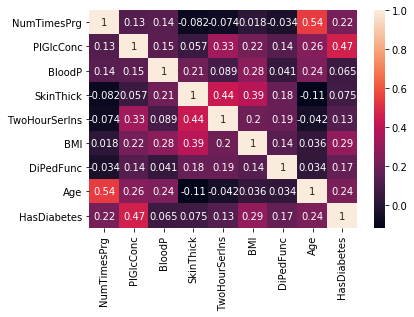

In [6]:
# graficar matriz de correlación
import seaborn as sns
sns.heatmap(corr, annot = True)

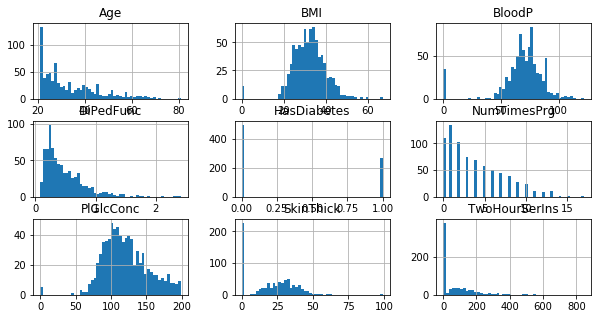

In [7]:
# visualizar los datos
import matplotlib.pyplot as plt
dataset.hist(bins=50, figsize=(10, 5))
plt.show()

### Trabajar los datos faltantes

A diferencia del turoial anterior, en esta ocasión se hará el remplazo de los datos faltantes con un ciclo for que itera en los nombres de las columnas que se quieren cambiar.

In [8]:
columns_to_change = ["BloodP","TwoHourSerIns",
                     "BMI","PlGlcConc","SkinThick"]

for names in columns_to_change:
    median_column = dataset[names].median()
    dataset[names] = dataset[names].replace(to_replace=0,value=median_column)

### División de los datos

Para procesar los datos y dejarlos listo para ser usados en los modelos se hará uso de la librería [NumPy](https://numpy.org/doc/stable/user/quickstart.html), la cual permite trabajar con estructuras de datos llamadas arrays, similares a los vectores y matrices de Matlab. 

Primero se importa la librería, y se crea un array con los valores guardados en el DataFrame que contiene el conjunto de datos que vamos a trabajar.

Se usa la idenxación para separar los datos en la entradas (X) y la salida que se quiere predecir (y). 

In [9]:
import numpy as np

array = dataset.values
X = array[:,0:-1]
y = array[:,-1]

Para hacerlos modelos se usará la librería Scikit Learn, en [esta liga](https://scikit-learn.org/stable/tutorial/basic/tutorial.html#machine-learning-the-problem-setting) se encuentra una introducción a los problemas de machine learning haciendo uso de esta librería.

Primero se normalizarán los datos para hacer más sencillo el proceso de aprendizaje debido a que es más eficiente tener columnas con valores que van en el mismo rango. Para entender más al respecto de la normalización pueden seguir [esta liga](https://towardsdatascience.com/understand-data-normalization-in-machine-learning-8ff3062101f0).

Como se puede ver al imprimir los datos podemos ver que estos estan escalados en valores entre cero y uno. 

In [10]:
# normalizar datos
from sklearn.preprocessing import MinMaxScaler as Scaler

scaler = Scaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

print(X_scaled)

[[0.35294118 0.67096774 0.48979592 ... 0.31492843 0.23441503 0.48333333]
 [0.05882353 0.26451613 0.42857143 ... 0.17177914 0.11656704 0.16666667]
 [0.47058824 0.89677419 0.40816327 ... 0.10429448 0.25362938 0.18333333]
 ...
 [0.29411765 0.49677419 0.48979592 ... 0.16359918 0.07130658 0.15      ]
 [0.05882353 0.52903226 0.36734694 ... 0.24335378 0.11571307 0.43333333]
 [0.05882353 0.31612903 0.46938776 ... 0.24948875 0.10119556 0.03333333]]


El siguiente paso consta de dividir los datos (X, y) en dos conjuntos, uno de entrenamiento (train) y otro de prueba (test). En [esta nota](https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/) hay una explicación sobre este tema. 

En este caso haremos un división de 80% para entrenamiento y 20% para prueba.

In [11]:
# dividir en 80% para entrenamiento y 20% para test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2)

Paso seguido importaremos distintos tipos de modelos. Crearemos una lista llamada models donde guardaremos las etiquetas y funciones que vamos a utilizar de cada tipo de método. En [esta nota](https://towardsdatascience.com/comparative-study-on-classic-machine-learning-algorithms-24f9ff6ab222#:~:text=KNN%20is%20a%20non-parametric%20model%2C%20where%20LR%20is%20a,can%20only%20output%20the%20labels.) hay una explicación teórica de algunos de estos modelos.

In [12]:
# importar algoritmos a probar
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection

# lista con todos los algoritmos
models = []
models.append(('LR', LogisticRegression(solver='lbfgs')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))
models.append(('LSVC', LinearSVC()))
models.append(('RFC', RandomForestClassifier(n_estimators=10)))
models.append(('DTR', DecisionTreeRegressor()))

Ahora se crearan dos listas, una llamada results y otra names, las cuales se usaran para guardar los resultados y los nombres de los modelos en el ciclo for donde se hará el entrenamiento. Cada modelo se entrenará 10 veces debido a que la aleatoriedad de los entrenamientos un mismo modelo no genera los mismos resultados en distintas corridas del mismo.

En cada iteración se imprime el nombre del algoritmo, la media del resultado en las 10 repeticiones y la desviación estándar de esas 10 repeticiones.

In [13]:
# preparar listas para los resultados
results = []
names = []

# entrenar todos los modelos
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(
        model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.776785 (0.070253)
KNN: 0.753940 (0.057031)
NB: 0.749101 (0.073540)
SVC: 0.775198 (0.069631)
LSVC: 0.783316 (0.071179)
RFC: 0.731200 (0.054678)
DTR: 0.693839 (0.046848)


Podemos ver los resultados de forma gráfica haciendo uso de una gráfica de cajas y bigotes, en [esta página](https://www.wellbeingatschool.org.nz/information-sheet/understanding-and-interpreting-box-plots) hay una descripción de como interpretar este tipo de gráficos. 

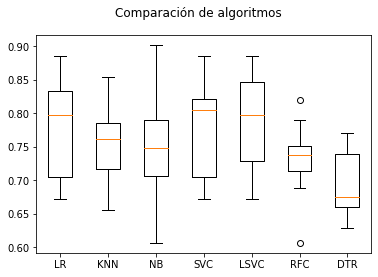

In [14]:
# comparacion con boxplot
fig = plt.figure()
fig.suptitle('Comparación de algoritmos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Elegimos el algoritmo SVC como el de mejor desempeño y hacemos el entrenamiento de los datos con solo este modelo pero haciendo un análisis de hiperparámetro, probando distintos valores de cada parámetro de entrada de la función de SVC. [Aquí](https://www.quora.com/What-are-hyperparameters-in-machine-learning) hay una pregunta en Quora donde se explica de manera sencilla sobre los hiperparámetros.

Una parte importante del uso de algortimos es hacer uso de la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) donde se explica que significa cada parámetro de entrada con los que se pueden trabajar. 

In [15]:
# buscar mejores resultados con SVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [1.0, 10.0, 50.0],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'shrinking': [True, False],
    'gamma': ['auto', 1, 0.1],
    'coef0': [0.0, 0.1, 0.5]
}

model_svc = SVC()

grid_search = GridSearchCV(
    model_svc, param_grid, cv=10, scoring='accuracy')

grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1.0, 10.0, 50.0], 'coef0': [0.0, 0.1, 0.5],
                         'gamma': ['auto', 1, 0.1],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                         'shrinking': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

A continuación se muestra el mejor resultado del análisis de hiperparámetros. Generalmente esperamos obtener resultados lo más cercanos a 1.0, aunque en este caso no fue así no debemos suponer que tenemos un mal modelo, en un problema de machine learning es importante usar estadística y otros ajustes para intentar mejorar el resultados obtenido.

In [16]:
grid_search.best_score_

0.7866208355367531

Con el siguiente comando podemos ver el mejor valor para cada parámetro, los que usaremos para entrenar un nuevo modelo con esos parámetros.

In [17]:
# aplicar mejores resultados para generar el mejor modelo
svc = grid_search.best_estimator_

print(svc)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [18]:
# entrenamos nuevo modelo
svc.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Podemos ver que el desempeño del modelo haciendo uso de los mejores valores para los parámetros.

In [19]:
svc.score(X,y)

0.7721354166666666

Podemos inventar un ejemplo de registro y usar el modelo entrenado para predecir si esos datos corresponden a un paciente con diabetes o no.

In [20]:
# hacer una predicción con datos nuevos (inventados)
new_df = pd.DataFrame([[6, 168, 72, 35, 0, 43.6, 0.627, 65]])

new_df_scaled = scaler.transform(new_df)

prediction = svc.predict(new_df_scaled)
print(prediction)

[0.]
